# Creando nuestro propio KNN

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib  import style
import warnings
from math import sqrt
from collections import Counter

In [3]:
dataset = {
    'k': [[1,2], [2,3], [3,1]],
    'r': [[6,5],[7,7],[8,6]]
}

new_point = [5,7]

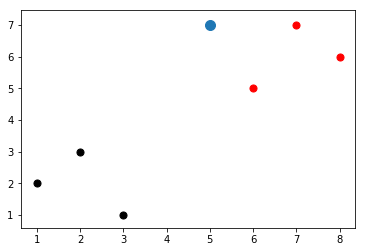

In [4]:
[[plt.scatter(ii[0], ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset ]
plt.scatter(new_point[0], new_point[1], s=100)

In [31]:
# data= dataset, predict = nueva informacion para predecir, k = vecinos 
def k_nearest_neighbors(data, predict, k=3, verbose = False):
    if len(data) >= k:
        warnings.warn("k es un valot menor que el número total de elementos a votar")
    
    distances = []
    for group in data:
        for feature in data[group]:
            #Calculamos la distancia euclidea. (Dos formas de hacerlo "A mano" y "numPy")
            #d = sqrt((feature[0]-predict[0])**2 + (feature[1]-predict[1])**2)
            #d = np.sqrt(np.sum(np.arrray(feature)- np.array(predict)**2))
            #Calcula la norma de euclides del vector calcular la norma del vector diferencia es lo mismo que lo anterior.
            d = np.linalg.norm(np.array(feature)- np.array(predict))
            distances.append([d, group])
    
    if verbose:
        print(distances)
    
    #Ordenamos las distancias y nos quedamos con los k primeros. (Ordenamos por la primera columna)
    votes = [i[1] for i in sorted(distances)[:k]]
    if verbose:
        print(votes)
    
    vote_result = Counter(votes).most_common(1)
    if verbose:
        print(vote_result)
    
    return vote_result[0][0] #[('r',2), ('k', 1)] rojo 2 votos, negros 1 voto

In [13]:
result = k_nearest_neighbors(dataset, new_point)
result

[[2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r'], [6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k']]
['r', 'r', 'r']
[('r', 3)]


'r'

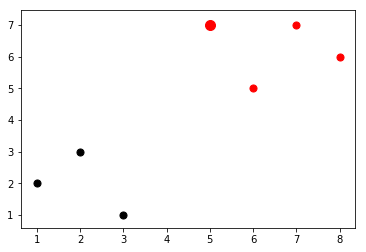

In [14]:
[[plt.scatter(ii[0], ii[1], s=50, color = i) for ii in dataset[i]] for i in dataset ]
plt.scatter(new_point[0], new_point[1], s=100, color = result)

# Aplicando nuestro KNN a los datos del dataset de cancer.

In [21]:
import pandas as pd
import random

In [16]:
#Cargamos dataset sobre el cancer en wisconsin
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/cancer/breast-cancer-wisconsin.data.txt"

#como no tienen nombre las columnas quitamos el nombre de las columnas.
df = pd.read_csv(url, header = None)

#Renombreamos las columnas
df.columns = ["Id", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "Class"]
df.head()

,Id,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [17]:
df1 = df.drop(["Id"], 1)

#Reemplazamos los interrogantes por un numero que no se tenga en consideracion. (inplace=True) hace el reemplazo directamente
df1.replace("?", -99999, inplace = True)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [22]:
#Convertimos los datos a float.
full_data = df1.astype(float).values.tolist()

In [23]:
random.shuffle(full_data)

In [24]:
test_size = 0.2

In [25]:
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

In [26]:
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [29]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])
    

In [33]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5) # K es el valor por defecto
        if group == vote: 
            correct += 1
        total += 1;

print("Eficacia del KNN = ", correct/total)

Eficacia del KNN =  0.9640287769784173
